# Capstone Part III - Machine Learning
### By Seshagiri Sriram

The full report and problem summary can be found [here](./ProjectReport.md).

In [1]:
import pandas as pd
import numpy as np

# Machine Learning & Data Science Helper Library
import sklearn
from sklearn.model_selection import KFold, train_test_split

In [2]:
apt_data = pd.read_csv('apartments_final.csv')

In [3]:
apt_data.head()

,Bedroom,Bathroom,Den,Lat,Long,Price,Downtown Proximity,Borough Color,Venue_Accessories_Store,Venue_Adult_Boutique,...,Venue_Vegetarian_/_Vegan_Restaurant,Venue_Video_Game_Store,Venue_Video_Store,Venue_Vietnamese_Restaurant,Venue_Whisky_Bar,Venue_Wine_Bar,Venue_Wine_Shop,Venue_Wings_Joint,Venue_Women's_Store,Venue_Yoga_Studio
0,1,1.0,1,43.643051,-79.391643,2150.0,0.106921,1,0,0,...,5,0,0,0,0,0,0,0,0,15
1,1,1.0,0,43.640918,-79.393982,1900.0,0.134128,1,0,0,...,2,0,0,0,0,0,0,0,0,8
2,1,1.0,0,43.641308,-79.400093,1900.0,0.169330,1,0,0,...,2,0,0,0,0,0,0,0,0,10
3,1,1.0,1,43.640068,-79.399960,2400.0,0.175443,1,0,0,...,7,0,0,0,0,0,0,0,0,35
4,1,1.0,0,43.647627,-79.390408,2650.0,0.068714,1,0,0,...,10,0,0,0,0,0,0,0,0,15


In [4]:
# Features
X = apt_data.drop(['Lat', 'Long', 'Price', 'Borough Color'], axis='columns')

# Price will be our labels
y = apt_data[['Price']]

## Train/Test/Validation Set : 60/20/20 Split. 
### In a real world, based on feedback, this split should be dynamically sized (MLOPS integration perhaps?) but for now will suffice. 

In [5]:
# Split 20% for test set
X_remain, X_test, y_remain, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split 20% (25% of 80%) for validation set... meaning 60% (75% of 80%) for training
X_train, X_val, y_train, y_val = train_test_split(X_remain, y_remain, test_size=0.25, random_state=42)

##  Identify "good models" by trying different Linear & Non-Linear Models that will best represent  our data. 
### Some models that we are testing with are: 
- Linear Regression
- Ridge Regression
- Lasso Regression
- Elastic Net
- SGD
- Bayesian Regression
- Logistical Regression
- SVM (SVR)

## Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import matplotlib
from matplotlib import pyplot as plt
import matplotlib.lines as mlines

In [7]:
linear_model = LinearRegression(fit_intercept=True)

# Train Linear Model
l_model = linear_model.fit(X_train, y_train)

# Predict on Test Data
predictions = l_model.predict(X_test)
predictions.shape

(153, 1)

Text(0, 0.5, 'Predicted Price')

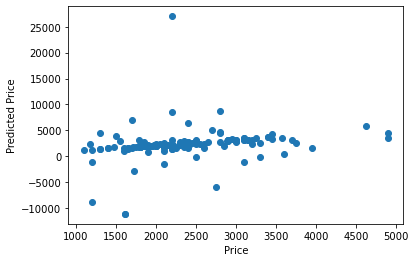

In [8]:
fig, ax = plt.subplots()
ax.scatter(y_test, predictions)
# plt.scatter(y_test, predictions)
ax.set_xlabel('Price')
ax.set_ylabel('Predicted Price')

In [9]:
score = l_model.score(X_test, y_test)
error = mean_squared_error(y_true=y_test, y_pred=predictions)
print("R^2: ", score)
print("RMSE: $", np.sqrt(error))

R^2:  -17.780102555839996
RMSE: $ 3007.526533541097


### Function to automate running models

In [10]:
def try_model(model_name, model, X_train, y_train, X_test, y_test):
    trained_model = model.fit(X=X_train, y=y_train)
    
    # Run on Test Data
    predictions = trained_model.predict(X_test)
    
    # Evaluate Performance
    score = trained_model.score(X_test, y_test)
    error = mean_squared_error(y_test, predictions)
    print("R^2", score)
    print("RMSE: $", np.sqrt(error))
    
    plt.scatter(y_test, predictions)
    plt.xlabel('Price')
    plt.ylabel('Predicted Price')
    return {'Model': model_name, 'R^2:': score, 'RMSE ($CAD)': np.sqrt(error)}

## Ridge Regression

d:\apps\python38\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
d:\apps\python38\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
d:\apps\python38\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
d:\apps\python38\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
d:\apps\python38\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: 

R^2 0.489726145875198
RMSE: $ 495.7493412862028


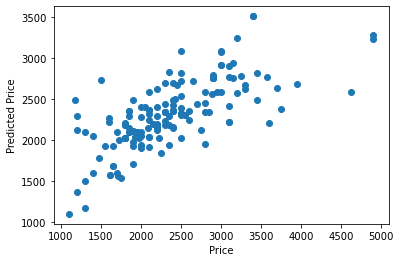

In [11]:
from sklearn.linear_model import RidgeCV
ridge_reg = RidgeCV(alphas=[1e-10, 1e-5, 1e-2, 0, 1, 10, 100], cv=3, fit_intercept=True, normalize=False)
performance = try_model('Ridge Regression', ridge_reg, X_train, y_train, X_test, y_test)

In [12]:
# Put model results into dataframe
model_perf = pd.DataFrame.from_dict([performance])
model_perf

,Model,R^2:,RMSE ($CAD)
0,Ridge Regression,0.489726,495.749341


## Lasso Regression

d:\apps\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5930346.175491694, tolerance: 1252025.7898360656
  model = cd_fast.enet_coordinate_descent(
d:\apps\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12933295.650125276, tolerance: 1252025.7898360656
  model = cd_fast.enet_coordinate_descent(
d:\apps\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14211594.332422223, tolerance: 1326361.8615081967
  model = cd_fast.enet_coordinate_descent(
d:\apps\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not conver

R^2 0.5893297729320905
RMSE: $ 444.74092696669385


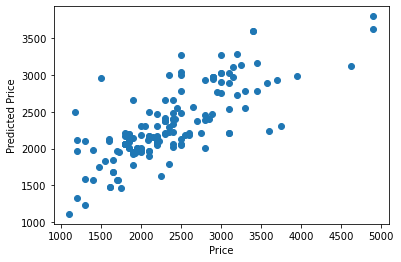

In [13]:
from sklearn.linear_model import LassoCV
lassoreg = LassoCV(alphas=[1, 10, 100], cv=3, tol=0.01)
performance = try_model('Lasso Regression', lassoreg, X_train, y_train.values.ravel(), X_test, y_test)
model_perf = model_perf.append(performance, ignore_index=True)

## Elastic Net

R^2 0.6037959787557616
RMSE: $ 436.8375143798886


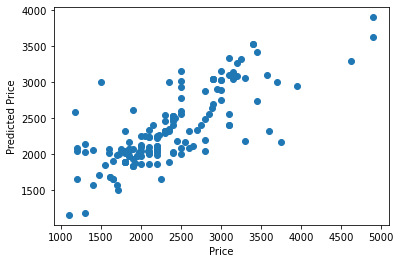

In [14]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha=0.05, tol=1 ,l1_ratio=0.6)
performance = try_model("Elastic Net", enet, X_train, y_train.values.ravel(), X_test, y_test)
model_perf = model_perf.append(performance, ignore_index=True)

## SGD

R^2 0.4560281635312129
RMSE: $ 511.857057044212


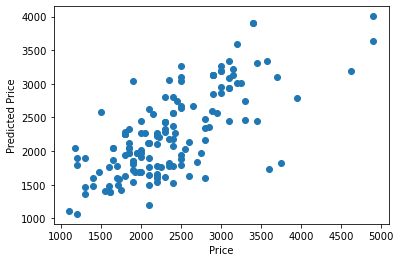

In [15]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(eta0=1e-5, tol=1e-5, learning_rate='adaptive')
performance = try_model('Stochiastic Gradient Descent', sgd, X_train, y_train.values.ravel(), X_test, y_test)
model_perf = model_perf.append(performance, ignore_index=True)

## Bayesian Regression

R^2 0.5589855136504323
RMSE: $ 460.8789952376588


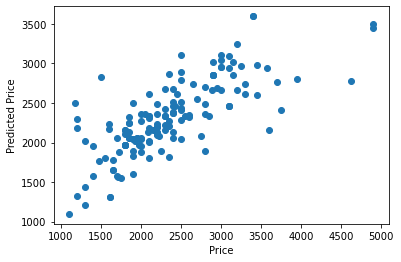

In [16]:
from sklearn.linear_model import BayesianRidge
brr = BayesianRidge()
performance = try_model('Bayesian Regression', brr, X_train, y_train.values.ravel(), X_test, y_test)
model_perf = model_perf.append(performance, ignore_index=True)

## Logistical Regression

R^2 0.27450980392156865
RMSE: $ 773.4335001051916


d:\apps\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


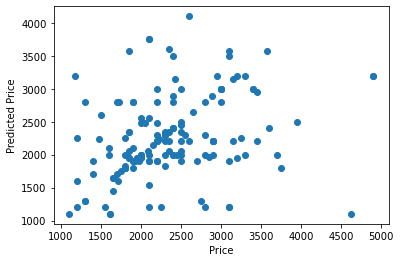

In [17]:
from sklearn.linear_model import LogisticRegression
# solver = newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga
# penalty = ‘l1’, ‘l2’
lrr = LogisticRegression()
performance = try_model('Logistical Regression', lrr, X_train, y_train.values.ravel(), X_test, y_test)
model_perf = model_perf.append(performance, ignore_index=True)

## SVM (SVR)

R^2 0.2888454281485544
RMSE: $ 585.2514399942687


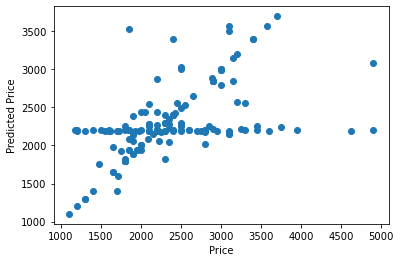

In [18]:
from sklearn.svm import SVR
# Kernels: ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid
svr = SVR(kernel='poly', degree=4, gamma='auto')
performance = try_model('SVM (Polynomial)', svr, X_train, y_train.values.ravel(), X_test, y_test)
model_perf = model_perf.append(performance, ignore_index=True)

R^2 0.5413837147389127
RMSE: $ 469.9863274484384


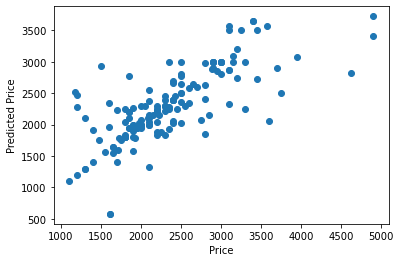

In [19]:
svr = SVR(kernel='linear', C=50)
try_model('SVM (Linear)', svr, X_train, y_train.values.ravel(), X_test, y_test)
model_perf = model_perf.append(performance, ignore_index=True)

## GBDT

R^2 0.5736038476656687
RMSE: $ 453.1762343114925


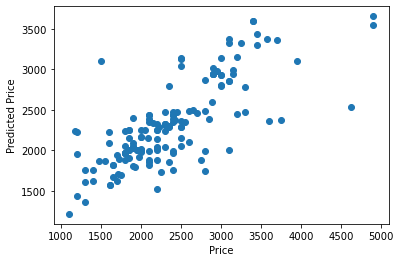

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
performance = try_model('Gradient Boosted Decision Tree', gbr, X_train, y_train.values.ravel(), X_test, y_test)
model_perf = model_perf.append(performance, ignore_index=True)

## Random Forest

R^2 0.5402728330041526
RMSE: $ 470.5551945630438


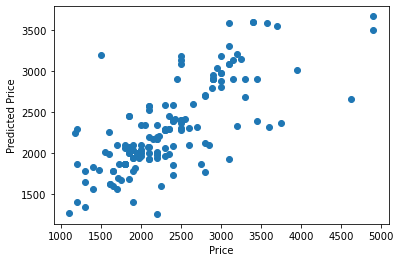

In [21]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=42, n_estimators=250)
performance = try_model("Random Forest Regressor", rfr, X_train, y_train.values.ravel(), X_test, y_test)
model_perf = model_perf.append(performance, ignore_index=True)

# Model Performance

In [22]:
model_perf

,Model,R^2:,RMSE ($CAD)
0,Ridge Regression,0.489726,495.749341
1,Lasso Regression,0.589330,444.740927
2,Elastic Net,0.603796,436.837514
3,Stochiastic Gradient Descent,0.456028,511.857057
4,Bayesian Regression,0.558986,460.878995
5,Logistical Regression,0.274510,773.433500
6,SVM (Polynomial),0.288845,585.251440
7,SVM (Polynomial),0.288845,585.251440
8,Gradient Boosted Decision Tree,0.573604,453.176234
9,Random Forest Regressor,0.540273,470.555195


Text(0, 0.5, 'Model Type\n')

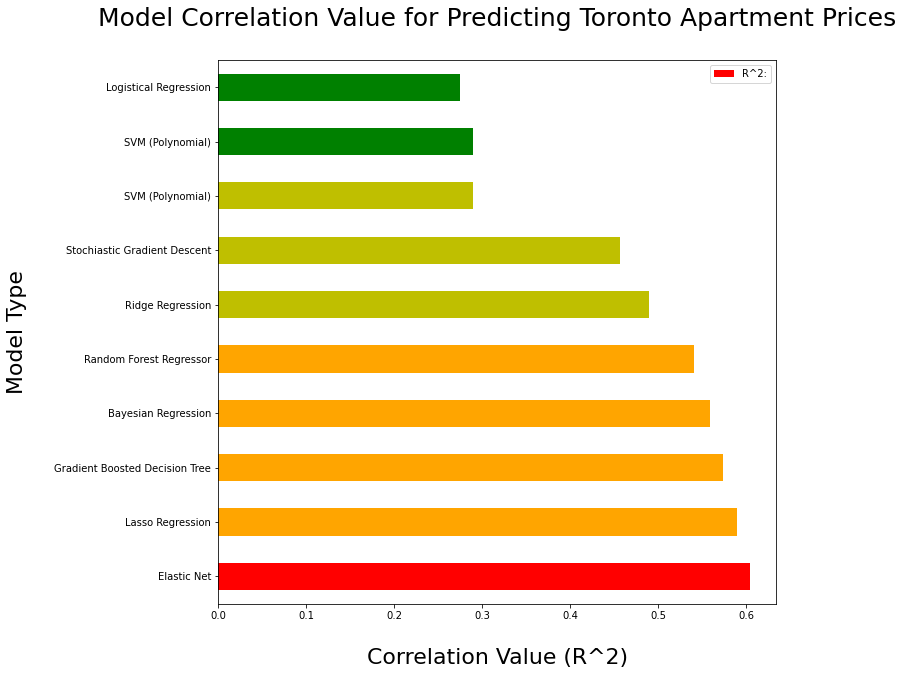

In [23]:
colors=['r' ,'orange','orange' ,'orange','orange' ,'y','y' ,'y','g' ,'g']

ax = model_perf.sort_values(by='R^2:', ascending=False).plot('Model', 'R^2:', kind='barh', figsize=(10,10), color=colors)
ax.set_title("Model Correlation Value for Predicting Toronto Apartment Prices\n", fontsize=25)
ax.set_xlabel("\nCorrelation Value (R^2)", fontsize=22)
ax.set_ylabel("Model Type\n", fontsize=22)

### The highest scoring regressor is the Elastic Net.

Text(0, 0.5, 'Model Type\n')

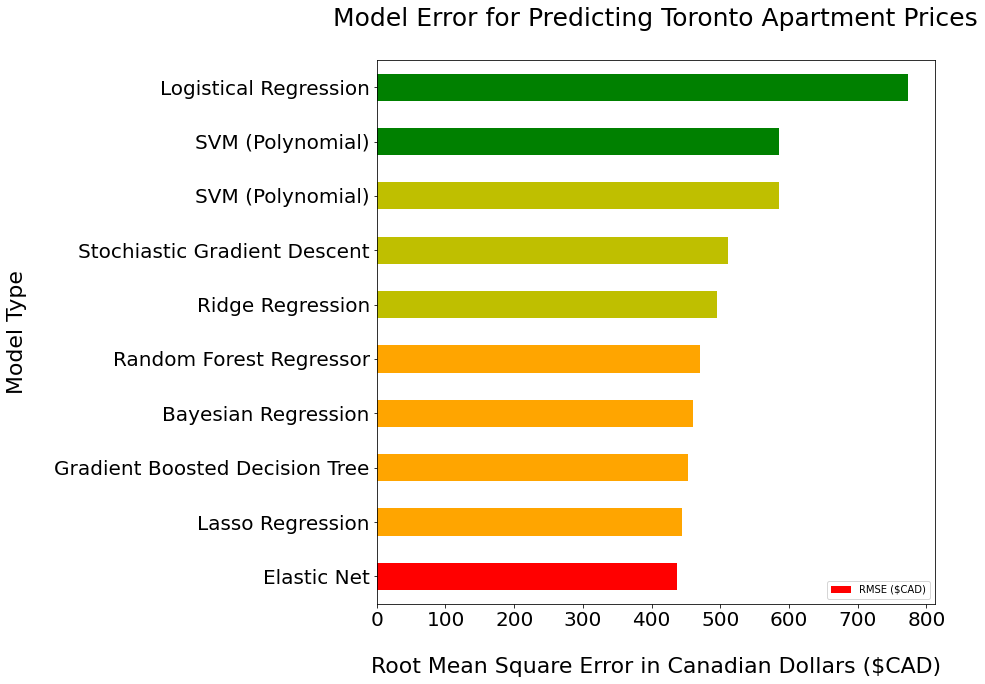

In [24]:
ax = model_perf.sort_values(by='RMSE ($CAD)').plot('Model', 'RMSE ($CAD)', kind='barh', figsize=(10, 10), color=colors, fontsize=20)
ax.set_title("Model Error for Predicting Toronto Apartment Prices\n", fontsize=25)
ax.set_xlabel("\nRoot Mean Square Error in Canadian Dollars ($CAD)", fontsize=22)
ax.set_ylabel("Model Type\n", fontsize=22)

### Looking at their Root Mean Square Error: again the Elastic Net performs the best with the lowest error.

## Random Search for Good Parameters for our Elastic Net

In [25]:
from sklearn.model_selection import RandomizedSearchCV

l1_ratio=[0, 0.1, 0.5, 0.6, 0.7, 0.9, 1]
alpha=[0.001, 0.05, 0.25, 0.5, 1, 2, 10]
fit_intercept=[True]
normalize=[True, False]
max_iter=[100, 500, 1000]
tol=[1, 1e-2, 1e-3, 1e-4, 1e-6]
positive=[False, True]
random_state=[None] 
selection=['cyclic', 'random']

# Create the random grid
random_grid = {
    'l1_ratio': l1_ratio,
    'alpha': alpha,
    'normalize': normalize,
    'max_iter': max_iter,
    'tol': tol,
    'positive':positive,
    'random_state': random_state,
    'selection': selection
}

print(random_grid)

{'l1_ratio': [0, 0.1, 0.5, 0.6, 0.7, 0.9, 1], 'alpha': [0.001, 0.05, 0.25, 0.5, 1, 2, 10], 'normalize': [True, False], 'max_iter': [100, 500, 1000], 'tol': [1, 0.01, 0.001, 0.0001, 1e-06], 'positive': [False, True], 'random_state': [None], 'selection': ['cyclic', 'random']}


In [26]:
rf_random = RandomizedSearchCV(estimator = ElasticNet(), param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train.values.ravel())

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 285 out of 300 | elapsed:   10.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   10.3s finished


RandomizedSearchCV(cv=3, estimator=ElasticNet(), n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': [0.001, 0.05, 0.25, 0.5, 1, 2,
                                                  10],
                                        'l1_ratio': [0, 0.1, 0.5, 0.6, 0.7, 0.9,
                                                     1],
                                        'max_iter': [100, 500, 1000],
                                        'normalize': [True, False],
                                        'positive': [False, True],
                                        'random_state': [None],
                                        'selection': ['cyclic', 'random'],
                                        'tol': [1, 0.01, 0.001, 0.0001, 1e-06]},
                   random_state=42, verbose=2)

In [27]:
rf_random.best_params_

{'tol': 0.001,
 'selection': 'cyclic',
 'random_state': None,
 'positive': False,
 'normalize': True,
 'max_iter': 100,
 'l1_ratio': 1,
 'alpha': 1}

In [28]:
def evaluate(model, test_features, test_labels):
    test_labels = test_labels.values.ravel()
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: ${:0.4f}.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [29]:
base_model = ElasticNet(alpha=0.05, tol=1 ,l1_ratio=0.6)
base_model.fit(X_train, y_train.values.ravel())
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: $291.1176.
Accuracy = 86.78%.


In [30]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: $316.9410.
Accuracy = 85.40%.


### The random parameters have similar accuracy to the base model parameters on our test set.

## Grid Search to Get the Best Parameters

In [31]:
from sklearn.model_selection import cross_val_predict, GridSearchCV, cross_val_score

In [42]:
parameters = [{
    'tol': [1e-3, 1e-1, 9e-1],
    'selection': ['random'],
    'random_state': [42],
    'positive': [False],
    'normalize': [True],
    'max_iter': [58, 60, 62],
    'l1_ratio': [0.58, 0.59, 0.6],
    'alpha': [0.9e-3, 1e-3, 1.1e-3]
}]

gsc = GridSearchCV(
    estimator=ElasticNet(),
    param_grid=parameters,
    iid=False, cv=3, 
    scoring='neg_mean_squared_error', 
    verbose=0, 
    n_jobs=-1)

In [33]:
grid_result = gsc.fit(X_train, y_train.values.ravel())
best_params = grid_result.best_params_

d:\apps\python38\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


In [34]:
best_params

{'alpha': 0.0011,
 'l1_ratio': 0.58,
 'max_iter': 62,
 'normalize': True,
 'positive': False,
 'random_state': 42,
 'selection': 'random',
 'tol': 0.001}

In [35]:
best_grid = grid_result.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Average Error: $318.1399.
Accuracy = 85.49%.


In [36]:
validation_accuracy = evaluate(best_grid, X_val, y_val)

Model Performance
Average Error: $339.3500.
Accuracy = 74.66%.


## Accuracy & Mean Squared Error (MSE)
### For the test set we get 86% accuracy with a MSE of \$291. 
### For the validation set we get 74% accuracy with a MSE of \$339

## Extracting Insights from our Model

### Now that the model is tuned, lets explore what features it thinks are important to find out what venues add the most value to apartments and which detract the most?

In [37]:
# Verify that our 300 features all have coefficients
len(best_grid.coef_)

313

In [38]:
feature_weights = { "Feature": X.columns.values, "Weight": best_grid.coef_ }
feature_weights = pd.DataFrame.from_dict(feature_weights)
feature_weights.head()

,Feature,Weight
0,Bedroom,326.744176
1,Bathroom,486.859337
2,Den,192.564013
3,Downtown Proximity,-636.494925
4,Venue_Accessories_Store,14.790388


In [39]:
# Idenitify main contributors and detractors for apartment price
contributors = feature_weights[feature_weights['Weight'] > 100]
detractors = feature_weights[feature_weights['Weight'] < -100]

Text(0, 0.5, 'Feature\n')

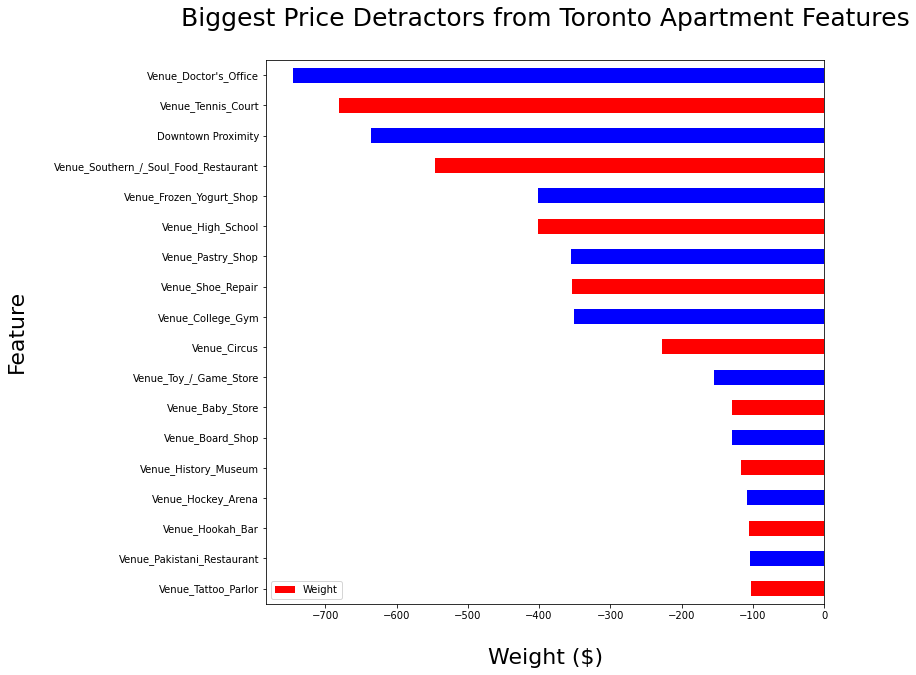

In [40]:
colors=['r' ,'b']

ax = detractors.sort_values(by='Weight', ascending=False).plot('Feature', 'Weight', kind='barh', figsize=(10,10), color=colors)
ax.set_title("Biggest Price Detractors from Toronto Apartment Features\n", fontsize=25)
ax.set_xlabel("\nWeight ($)", fontsize=22)
ax.set_ylabel("Feature\n", fontsize=22)

Being close to downtown correlates with higher apartment price. Being further away from downtown the drops prices significantly. Surprisingly being close to doctor's office is the biggest detractor to apartment prices. We also see that venues like hookah bars, tattoo parlors and certain kinds of ethnic restaurants also occur in places with lower apartment prices


Text(0, 0.5, 'Feature\n')

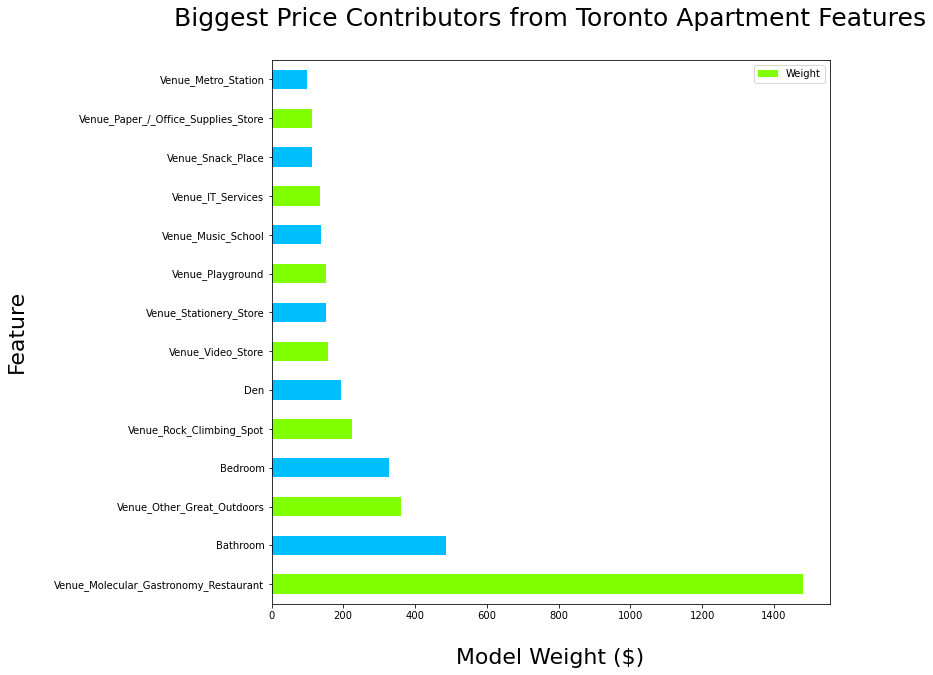

In [41]:
colors=['chartreuse', 'deepskyblue']

ax = contributors.sort_values(by='Weight', ascending=False).plot('Feature', 'Weight', kind='barh', figsize=(10,10), color=colors)
ax.set_title("Biggest Price Contributors from Toronto Apartment Features\n", fontsize=25)
ax.set_xlabel("\nModel Weight ($)", fontsize=22)
ax.set_ylabel("Feature\n", fontsize=22)

Conversely, we can see that apartments having more bedrooms, bathrooms, and dens contribute to more expensive apartments. The main venues that contribute are parks and outdoor venues like playgrounds, golf courses, and rock climbing spots. Surprisingly, the biggest contributoes are venues that support Modern cooking styles like molecular gastoronomy. 